In [1]:
#! pip install --upgrade pandas==1.4.1
import pandas as pd
import numpy as np
import pickle

from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print(pd. __version__)

1.4.1


In [5]:
url_1='https://drive.google.com/file/d/1Kjy6nA9sj9sSN6HoZl23p2JjB6pa86VM/view?usp=drive_link'
url_1='https://drive.google.com/uc?id=' + url_1.split('/')[-2]

test = pd.read_pickle(url_1)
test.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,...,NaN,NaN,NaN,0.002705,0.006184,0.001899,NaN,0.008186,0.005558,0.002983
1,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,...,NaN,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008156,0.006943,0.000905
2,00018dd4932409baf6083519b52113c2ef58be59e1213e...,2018-03-26,0.894531,0.007793,0.017899,0.812012,0.007027,0.097107,0.008308,0.009979,...,NaN,NaN,NaN,0.004284,0.006908,0.007717,NaN,0.004929,0.008560,0.004406
3,000198b3dc70edd65dbf0d7eddbcb926c6d7dbd7986af1...,2018-03-28,0.527344,0.360352,0.041718,0.673340,0.006729,0.838867,0.001353,0.049042,...,NaN,NaN,NaN,1.005859,0.005123,0.888672,0.191284,1.009766,0.670410,0.186768
4,00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b7...,2018-03-27,0.828125,0.120239,0.027313,1.001953,0.001572,0.175781,0.006531,0.019485,...,NaN,NaN,NaN,1.004883,0.000700,0.890625,0.161011,1.002930,0.508789,0.093628


In [4]:
#url_2='https://drive.google.com/file/d/1iI0Nia86HTiQ4Xg4GOvHK3My7JwfQ5cD/view?usp=drive_link'
#url_2='https://drive.google.com/uc?id=' + url_2.split('/')[-2]

#train = pd.read_pickle(url_2)
#train.head()

# в случае ошибки чтения файла train.pkl с google drive, запустить строки ниже (файл будет скачан локально).

import gdown
url_2='https://drive.google.com/file/d/1iI0Nia86HTiQ4Xg4GOvHK3My7JwfQ5cD/view?usp=drive_link'
url_2='https://drive.google.com/uc?id=' + url_2.split('/')[-2]
output = 'train.pkl'
gdown.download(url_2, output, quiet=False, format='pkl')
train = pd.read_pickle(output)
train.head()

Downloading...
From (uriginal): https://drive.google.com/uc?id=1iI0Nia86HTiQ4Xg4GOvHK3My7JwfQ5cD
From (redirected): https://drive.google.com/uc?id=1iI0Nia86HTiQ4Xg4GOvHK3My7JwfQ5cD&confirm=t&uuid=0466eca2-7780-46a2-abd1-9dd26b21e6af
To: C:\Users\ChebuTech\Desktop\задача Credit Risk\train.pkl
100%|███████████████████████████████████████████████████████████████████████████████| 165M/165M [00:14<00:00, 11.6MB/s]


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
3,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,2018-03-19,0.824219,0.009773,0.007851,1.001953,0.006886,0.395752,0.002855,0.006134,...,NaN,NaN,0.009399,0.007835,0.000957,NaN,0.009056,0.006943,0.001446,0
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2018-03-12,0.477051,0.000467,0.009415,1.008789,0.007774,0.267090,0.006126,0.125977,...,NaN,NaN,0.006012,0.005222,0.000937,NaN,0.009789,0.003704,0.006275,0


In [3]:
#import joblib

#path2 = r"C:\Users\ChebuTech\Desktop\задача Credit Risk\train.pkl"
#train = joblib.load(open(path2, 'rb'))
#path1 = r"C:\Users\ChebuTech\Desktop\задача Credit Risk\test.pkl"
#test = joblib.load(open(path1, 'rb'))

In [4]:
# customer_ID не имеет дубликатов
train['customer_ID'].value_counts().loc[lambda x : x>1]

Series([], Name: customer_ID, dtype: int64)

<AxesSubplot:ylabel='Frequency'>

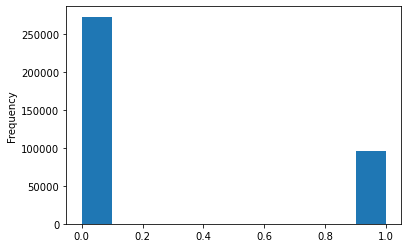

In [5]:
train['target'].astype(int).plot.hist()

In [6]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368710 entries, 0 to 368709
Columns: 191 entries, customer_ID to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1), object(1)
memory usage: 136.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90203 entries, 0 to 90202
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), datetime64[ns](1), float16(177), object(1)
memory usage: 32.8+ MB
None


In [7]:
#train.isnull().sum()
train.isna().sum()

customer_ID         0
S_2                 0
P_2              2520
D_39                0
B_1                 0
                ...  
D_142          304099
D_143            2258
D_144               0
D_145            2258
target              0
Length: 191, dtype: int64

In [8]:
categories = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
train[categories].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368710 entries, 0 to 368709
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   B_30    368679 non-null  category
 1   B_38    368679 non-null  category
 2   D_114   363991 non-null  category
 3   D_116   363991 non-null  category
 4   D_117   363991 non-null  category
 5   D_120   363991 non-null  category
 6   D_126   368710 non-null  category
 7   D_63    368710 non-null  category
 8   D_64    368710 non-null  category
 9   D_66    42492 non-null   category
 10  D_68    361511 non-null  category
dtypes: category(11)
memory usage: 3.9 MB


In [4]:
# список всех унакальных категориальных данных по столбцам.
categories_df = train[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]

def find_unique(col):
    print(col,":",categories_df[col].unique())
for col in categories_df.columns:
    find_unique(col)

B_30 : [0.0, 1.0, 2.0, NaN]
Categories (3, float64): [0.0, 1.0, 2.0]
B_38 : [2.0, 1.0, 3.0, 7.0, 5.0, 6.0, 4.0, NaN]
Categories (7, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
D_114 : [1.0, 0.0, NaN]
Categories (2, float64): [0.0, 1.0]
D_116 : [0.0, NaN, 1.0]
Categories (2, float64): [0.0, 1.0]
D_117 : [4.0, -1.0, 1.0, 2.0, 6.0, 3.0, 5.0, NaN]
Categories (7, float64): [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
D_120 : [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
D_126 : [1.0, 0.0]
Categories (3, float64): [-1.0, 0.0, 1.0]
D_63 : ['CR', 'CO', 'CL', 'XL', 'XZ', 'XM']
Categories (6, object): ['CL', 'CO', 'CR', 'XL', 'XM', 'XZ']
D_64 : ['O', 'R', 'U', '']
Categories (5, object): ['', '-1', 'O', 'R', 'U']
D_66 : [NaN, 1.0]
Categories (2, float64): [0.0, 1.0]
D_68 : [6.0, 3.0, 5.0, 4.0, 2.0, 1.0, NaN]
Categories (7, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [10]:
# кодирование (encode) категориальных данных в чиловые.
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in categories_df.columns:
    train[col]=le.fit_transform(train[col])
    test[col]=le.fit_transform(test[col])

train[categories].head()

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0,1,1,0,4,0,1,2,1,1,5
1,0,1,1,0,0,0,1,1,1,1,5
2,0,0,1,0,0,0,1,1,2,1,5
3,0,1,1,0,1,0,1,1,2,1,5
4,0,2,0,0,2,0,0,1,2,1,2


In [11]:
# замена значений NaN на 0.

for i in train.select_dtypes(include=['float16']).columns:
    train[i] = train[i].replace(np.nan, 0)
for i in test.select_dtypes(include=['float16']).columns:
    test[i] = test[i].replace(np.nan, 0)

In [12]:
# поиск сильных выбросов (outliers) в численных данных.

for i in train.select_dtypes(include=['float16']).columns:
    max_thresold=train[i].quantile(0.95)
    min_thresold=train[i].quantile(0.05)
    train_no_outlier=train[(train[i] < max_thresold) & (train[i] > min_thresold)].shape
    print(" outlier in ",i,"is" ,int(((train.shape[0]-train_no_outlier[0])/train.shape[0])*100),"%")

 outlier in  P_2 is 10 %
 outlier in  D_39 is 10 %
 outlier in  B_1 is 10 %
 outlier in  B_2 is 10 %
 outlier in  R_1 is 10 %
 outlier in  S_3 is 24 %
 outlier in  D_41 is 10 %
 outlier in  B_3 is 10 %
 outlier in  D_42 is 91 %
 outlier in  D_43 is 34 %
 outlier in  D_44 is 10 %
 outlier in  B_4 is 10 %
 outlier in  D_45 is 10 %
 outlier in  B_5 is 10 %
 outlier in  R_2 is 10 %
 outlier in  D_46 is 26 %
 outlier in  D_47 is 10 %
 outlier in  D_48 is 18 %
 outlier in  D_49 is 93 %
 outlier in  B_6 is 10 %
 outlier in  B_7 is 10 %
 outlier in  B_8 is 12 %
 outlier in  D_50 is 62 %
 outlier in  D_51 is 10 %
 outlier in  B_9 is 10 %
 outlier in  R_3 is 10 %
 outlier in  D_52 is 10 %
 outlier in  P_3 is 11 %
 outlier in  B_10 is 10 %
 outlier in  D_53 is 76 %
 outlier in  S_5 is 10 %
 outlier in  B_11 is 10 %
 outlier in  S_6 is 11 %
 outlier in  D_54 is 15 %
 outlier in  R_4 is 10 %
 outlier in  S_7 is 24 %
 outlier in  B_12 is 10 %
 outlier in  S_8 is 10 %
 outlier in  D_55 is 11 %
 outli

In [5]:
# удаление строк с данными, у которых выбросы (outliers) около 10%

for i in train.select_dtypes(include=['float16']).columns:
    max_thresold=train[i].quantile(0.95)
    min_thresold=train[i].quantile(0.05)
    train_no_outlier = train[(train[i] < max_thresold) & (train[i] > min_thresold)]

train_no_outlier.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
3,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,2018-03-19,0.824219,0.009773,0.007851,1.001953,0.006886,0.395752,0.002855,0.006134,...,NaN,NaN,0.009399,0.007835,0.000957,NaN,0.009056,0.006943,0.001446,0
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2018-03-12,0.477051,0.000467,0.009415,1.008789,0.007774,0.267090,0.006126,0.125977,...,NaN,NaN,0.006012,0.005222,0.000937,NaN,0.009789,0.003704,0.006275,0


In [14]:
submission = test['customer_ID']   #  df для подстановки итоговых прогнозов и размещении в папке data.

test = test.drop(columns=['customer_ID','S_2'])

### Определение Polynomial features

In [15]:
# Поиск максимальных значений корреляции с сортировкой самых значимых.

correlations = train_no_outlier.corr()['target'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 D_58      0.501105
D_75      0.501815
B_7       0.505208
B_3       0.508961
D_44      0.517953
D_55      0.526420
D_61      0.543899
B_9       0.551080
D_48      0.595863
target    1.000000
Name: target, dtype: float64

Most Negative Correlations:
 P_2     -0.656619
B_2     -0.559961
B_18    -0.547421
B_33    -0.522445
D_112   -0.346210
P_3     -0.313004
D_77    -0.305351
D_62    -0.300023
S_25    -0.297591
D_47    -0.288488
Name: target, dtype: float64


In [16]:
# 4 переменные с наибольшими значениями негативной корреляции к столбцу target: P_2, B_2, B_18, B_33.
ext_data = train[['target', 'P_2', 'B_2', 'B_18', 'B_33']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,target,P_2,B_2,B_18,B_33
target,1.000000,-0.649888,-0.558087,-0.546360,-0.520863
P_2,-0.649888,1.000000,0.580824,0.605643,0.558379
B_2,-0.558087,0.580824,1.000000,0.860328,0.918616
B_18,-0.546360,0.605643,0.860328,1.000000,0.863591
B_33,-0.520863,0.558379,0.918616,0.863591,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

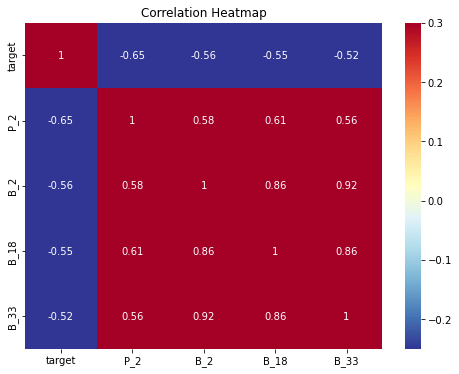

In [17]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.3)
plt.title('Correlation Heatmap')

In [18]:
# Создание новой df с polynomial features
poly_features = train_no_outlier[['P_2', 'B_2', 'B_18', 'B_33', 'target']]
poly_features_test = test[['P_2', 'B_2', 'B_18', 'B_33']]

# SimpleImputer для обработки пропущенных значений.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

poly_target = poly_features['target']
poly_features = poly_features.drop(columns = ['target'])

# Добавление недостающих значений
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Создание полиномиального объекта, возведение в степень.
poly_transformer = PolynomialFeatures(degree = 3)

In [19]:
# Train polynomial features
poly_transformer.fit(poly_features)

# Transform features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (331721, 35)


In [20]:
# get_feature_names - создаёт множество новых features. 
# Всего получилось 35 features, возведённых в 3 степень. 

poly_transformer.get_feature_names(input_features = ['P_2', 'B_2', 'B_18', 'B_33'])

['1',
 'P_2',
 'B_2',
 'B_18',
 'B_33',
 'P_2^2',
 'P_2 B_2',
 'P_2 B_18',
 'P_2 B_33',
 'B_2^2',
 'B_2 B_18',
 'B_2 B_33',
 'B_18^2',
 'B_18 B_33',
 'B_33^2',
 'P_2^3',
 'P_2^2 B_2',
 'P_2^2 B_18',
 'P_2^2 B_33',
 'P_2 B_2^2',
 'P_2 B_2 B_18',
 'P_2 B_2 B_33',
 'P_2 B_18^2',
 'P_2 B_18 B_33',
 'P_2 B_33^2',
 'B_2^3',
 'B_2^2 B_18',
 'B_2^2 B_33',
 'B_2 B_18^2',
 'B_2 B_18 B_33',
 'B_2 B_33^2',
 'B_18^3',
 'B_18^2 B_33',
 'B_18 B_33^2',
 'B_33^3']

In [21]:
# Создание dataframe с polynomial features.
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['P_2', 'B_2', 'B_18', 'B_33']))
# Add the target
poly_features['target'] = poly_target

In [22]:
# Создание df для test polynomial features.
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['P_2', 'B_2', 'B_18', 'B_33']))

# Добавление polnomial features в training dataframe.
poly_features['customer_ID'] = train_no_outlier['customer_ID']
app_train_poly = pd.merge(train_no_outlier, poly_features, how = 'left')

# Добавление polnomial features в testing dataframe.
poly_features_test['customer_ID'] = submission
app_test_poly = test.merge(poly_features_test, how = 'left')

# Выравнивание (align)  dataframe'ов.
app_train_poly, app_test_poly = app_train_poly.align(
    app_test_poly.drop_duplicates(subset=['customer_ID']), join = 'inner', axis = 1)

print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (331721, 220)
Testing data with polynomial features shape:   (90203, 220)


In [ ]:
train_no_outlier

In [23]:
X = app_train_poly.drop(columns=['customer_ID'])
y = train_no_outlier['target']

app_test_poly = app_test_poly.drop(columns=['customer_ID'])

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state = 7)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(248790, 219) (248790,)
(82931, 219) (82931,)


### Подбор оптимальных параметров для модели с использованием Optuna

In [82]:
import optuna
from sklearn.metrics import accuracy_score,classification_report

cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

def objective(trial):
    param = {
        "objective": "Logloss",
        "learning_rate": trial.suggest_uniform("learning_rate", 0.001, 0.05),
        "depth": trial.suggest_int("depth", 1, 8),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10.0),
        "used_ram_limit": "6gb",
        "max_bin": trial.suggest_int("max_bin", 200, 400),
        'random_state': trial.suggest_categorical('random_state', [78]),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "eval_metric" : "AUC",
        "n_estimators": 500,
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli"]  #'Poisson', 'MVS'
        #"max_depth": trial.suggest_categorical("max_depth", [5,7,9,11,13,15]),
        #"boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        #"task_type": "GPU"
        ),
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(x_train, y_train, eval_set=[(x_test, y_test)], cat_features=cat_features,verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(x_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, timeout=3000)

    print("Number of finished trials: {}".format(len(study.trials)))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-09-15 10:09:54,156] A new study created in memory with name: no-name-e2d6e68e-c8a9-42a2-bab3-ec35d1ffcc20
[I 2023-09-15 10:12:42,991] Trial 0 finished with value: 0.9150980935958809 and parameters: {'learning_rate': 0.025935469828523468, 'depth': 8, 'l2_leaf_reg': 5.786245352105927, 'max_bin': 285, 'random_state': 78, 'min_data_in_leaf': 168, 'colsample_bylevel': 0.07880937863677857, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 5.174542841658254}. Best is trial 0 with value: 0.9150980935958809.
[I 2023-09-15 10:15:57,668] Trial 1 finished with value: 0.9177750177858702 and parameters: {'learning_rate': 0.03760440553957428, 'depth': 8, 'l2_leaf_reg': 0.2258640551819445, 'max_bin': 391, 'random_state': 78, 'min_data_in_leaf': 225, 'colsample_bylevel': 0.08775462528539855, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.8683887062930715}. Best is trial 1 with value: 0.9177750177858702.
[I 2023-09-15 10:17:49,249] Trial 2 finished with value: 0.9174012130566375 and p

[I 2023-09-15 10:52:04,408] Trial 20 finished with value: 0.919222003834513 and parameters: {'learning_rate': 0.04242998578162021, 'depth': 8, 'l2_leaf_reg': 0.0025622207976087486, 'max_bin': 273, 'random_state': 78, 'min_data_in_leaf': 296, 'colsample_bylevel': 0.0667345715565686, 'bootstrap_type': 'Bernoulli', 'subsample': 0.57703288120609}. Best is trial 20 with value: 0.919222003834513.
[I 2023-09-15 10:54:24,535] Trial 21 finished with value: 0.9188843737564963 and parameters: {'learning_rate': 0.04274818394860333, 'depth': 8, 'l2_leaf_reg': 0.002191985287596433, 'max_bin': 265, 'random_state': 78, 'min_data_in_leaf': 295, 'colsample_bylevel': 0.06804250300360958, 'bootstrap_type': 'Bernoulli', 'subsample': 0.597797680069702}. Best is trial 20 with value: 0.919222003834513.
[I 2023-09-15 10:56:39,734] Trial 22 finished with value: 0.9191134798808648 and parameters: {'learning_rate': 0.049428575319927115, 'depth': 8, 'l2_leaf_reg': 0.006294734780441238, 'max_bin': 273, 'random_stat

Number of finished trials: 25
Best trial:
  Value: 0.9196440414320338
  Params: 
    learning_rate: 0.04350667172323587
    depth: 8
    l2_leaf_reg: 0.008793451042115933
    max_bin: 270
    random_state: 78
    min_data_in_leaf: 261
    colsample_bylevel: 0.06112511689173349
    bootstrap_type: Bernoulli
    subsample: 0.5426492568692888


In [ ]:
# Динамика оптимизации: показывает результаты всех испытаний, а также лучший результат в каждой точке.
optuna.visualization.plot_optimization_history(study)
# Параллельные координаты: визуализация гиперпараметров и их оценка.
optuna.visualization.plot_parallel_coordinate(study)
# Parameter importances.
optuna.visualization.plot_param_importances(study)

In [31]:
from sklearn.model_selection import KFold

catb = CatBoostClassifier(iterations = 500,
                          loss_function = 'Logloss',
                          eval_metric = 'AUC',
                          learning_rate = 0.04350667172323587,
                          depth = 8,
                          l2_leaf_reg = 0.008793451042115933,
                          max_bin = 270,
                          random_state = 78,
                          min_data_in_leaf = 261,
                          colsample_bylevel = 0.06112511689173349,
                          bootstrap_type = 'Bernoulli',
                          subsample = 0.5426492568692888,
                          metric_period = 50,
                          od_type = "Iter",
                          od_wait=5,
                          random_strength=1,
                          cat_features=cat_features
)

preds = np.zeros(app_test_poly.shape[0])
kf = KFold(n_splits=10, random_state=78, shuffle=True)
n=0
for trn_idx, test_idx in kf.split(X,y):
    X_tr,X_val=X.iloc[trn_idx], X.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx], y.iloc[test_idx]
    model = catb
    model.fit(X_tr, y_tr, eval_set = [(X_val,y_val)], cat_features=cat_features, use_best_model=True, plot=True)
    preds1 = model.predict(app_test_poly)
    n+=1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9323423	best: 0.9323423 (0)	total: 261ms	remaining: 2m 10s
50:	test: 0.9556726	best: 0.9556726 (50)	total: 12.3s	remaining: 1m 48s
100:	test: 0.9578111	best: 0.9578111 (100)	total: 23.5s	remaining: 1m 32s
150:	test: 0.9589119	best: 0.9589119 (150)	total: 34.9s	remaining: 1m 20s
200:	test: 0.9595223	best: 0.9595223 (200)	total: 45.8s	remaining: 1m 8s
250:	test: 0.9598968	best: 0.9598968 (250)	total: 56.8s	remaining: 56.3s
300:	test: 0.9603043	best: 0.9603043 (300)	total: 1m 9s	remaining: 46s
350:	test: 0.9605714	best: 0.9605714 (350)	total: 1m 21s	remaining: 34.6s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.9606564937
bestIteration = 365

Shrink model to first 366 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9256059	best: 0.9256059 (0)	total: 248ms	remaining: 2m 3s
50:	test: 0.9526784	best: 0.9526784 (50)	total: 12.2s	remaining: 1m 47s
100:	test: 0.9550102	best: 0.9550102 (100)	total: 23.4s	remaining: 1m 32s
150:	test: 0.9561188	best: 0.9561188 (150)	total: 34.9s	remaining: 1m 20s
200:	test: 0.9568429	best: 0.9568429 (200)	total: 46.1s	remaining: 1m 8s
250:	test: 0.9573000	best: 0.9573000 (250)	total: 57s	remaining: 56.5s
300:	test: 0.9576506	best: 0.9576506 (300)	total: 1m 8s	remaining: 45.1s
350:	test: 0.9579278	best: 0.9579278 (350)	total: 1m 20s	remaining: 34.2s
400:	test: 0.9581459	best: 0.9581459 (400)	total: 1m 31s	remaining: 22.7s
450:	test: 0.9583023	best: 0.9583023 (450)	total: 1m 44s	remaining: 11.3s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.9583470786
bestIteration = 460

Shrink model to first 461 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9327504	best: 0.9327504 (0)	total: 259ms	remaining: 2m 9s
50:	test: 0.9551470	best: 0.9551470 (50)	total: 13.5s	remaining: 1m 59s
100:	test: 0.9573806	best: 0.9573806 (100)	total: 25.4s	remaining: 1m 40s
150:	test: 0.9584302	best: 0.9584302 (150)	total: 37.5s	remaining: 1m 26s
200:	test: 0.9589554	best: 0.9589554 (200)	total: 50.9s	remaining: 1m 15s
250:	test: 0.9593490	best: 0.9593490 (250)	total: 1m 2s	remaining: 1m 2s
300:	test: 0.9596654	best: 0.9596654 (300)	total: 1m 14s	remaining: 49.2s
350:	test: 0.9598812	best: 0.9598812 (350)	total: 1m 27s	remaining: 37.3s
400:	test: 0.9600867	best: 0.9600867 (400)	total: 1m 41s	remaining: 25s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.9601256348
bestIteration = 405

Shrink model to first 406 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9307430	best: 0.9307430 (0)	total: 249ms	remaining: 2m 4s
50:	test: 0.9531055	best: 0.9531055 (50)	total: 12.6s	remaining: 1m 51s
100:	test: 0.9556964	best: 0.9556964 (100)	total: 23.5s	remaining: 1m 32s
150:	test: 0.9569153	best: 0.9569153 (150)	total: 34.1s	remaining: 1m 18s
200:	test: 0.9576640	best: 0.9576640 (200)	total: 45s	remaining: 1m 6s
250:	test: 0.9581226	best: 0.9581237 (249)	total: 56.3s	remaining: 55.9s
300:	test: 0.9584499	best: 0.9584499 (300)	total: 1m 7s	remaining: 44.5s
350:	test: 0.9586960	best: 0.9586960 (350)	total: 1m 18s	remaining: 33.2s
400:	test: 0.9588630	best: 0.9588682 (399)	total: 1m 32s	remaining: 22.8s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.95899187
bestIteration = 441

Shrink model to first 442 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9319864	best: 0.9319864 (0)	total: 227ms	remaining: 1m 53s
50:	test: 0.9548119	best: 0.9548119 (50)	total: 12.9s	remaining: 1m 53s
100:	test: 0.9568382	best: 0.9568382 (100)	total: 25.5s	remaining: 1m 40s
150:	test: 0.9579939	best: 0.9579939 (150)	total: 36s	remaining: 1m 23s
200:	test: 0.9587109	best: 0.9587109 (200)	total: 47.1s	remaining: 1m 10s
250:	test: 0.9591483	best: 0.9591483 (250)	total: 57.7s	remaining: 57.3s
300:	test: 0.9595041	best: 0.9595041 (300)	total: 1m 10s	remaining: 46.8s
350:	test: 0.9598374	best: 0.9598374 (350)	total: 1m 24s	remaining: 36.1s
400:	test: 0.9600504	best: 0.9600504 (400)	total: 1m 38s	remaining: 24.4s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.9601408736
bestIteration = 432

Shrink model to first 433 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9315350	best: 0.9315350 (0)	total: 295ms	remaining: 2m 27s
50:	test: 0.9540751	best: 0.9540751 (50)	total: 14.1s	remaining: 2m 3s
100:	test: 0.9564582	best: 0.9564582 (100)	total: 28.6s	remaining: 1m 52s
150:	test: 0.9574599	best: 0.9574599 (150)	total: 43.3s	remaining: 1m 40s
200:	test: 0.9580468	best: 0.9580468 (200)	total: 58.1s	remaining: 1m 26s
250:	test: 0.9584797	best: 0.9584797 (250)	total: 1m 13s	remaining: 1m 12s
300:	test: 0.9587881	best: 0.9587881 (300)	total: 1m 25s	remaining: 56.8s
350:	test: 0.9591361	best: 0.9591361 (350)	total: 1m 39s	remaining: 42.4s
400:	test: 0.9593322	best: 0.9593335 (399)	total: 1m 52s	remaining: 27.7s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.9593557628
bestIteration = 404

Shrink model to first 405 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9322453	best: 0.9322453 (0)	total: 257ms	remaining: 2m 8s
50:	test: 0.9544318	best: 0.9544318 (50)	total: 12.9s	remaining: 1m 53s
100:	test: 0.9566945	best: 0.9566945 (100)	total: 24.7s	remaining: 1m 37s
150:	test: 0.9577634	best: 0.9577634 (150)	total: 36.5s	remaining: 1m 24s
200:	test: 0.9583995	best: 0.9583995 (200)	total: 48.8s	remaining: 1m 12s
250:	test: 0.9588144	best: 0.9588144 (250)	total: 59.3s	remaining: 58.9s
300:	test: 0.9591102	best: 0.9591102 (300)	total: 1m 10s	remaining: 46.5s
350:	test: 0.9593929	best: 0.9593929 (350)	total: 1m 21s	remaining: 34.6s
400:	test: 0.9596013	best: 0.9596013 (400)	total: 1m 32s	remaining: 22.9s
450:	test: 0.9597527	best: 0.9597557 (449)	total: 1m 43s	remaining: 11.2s
499:	test: 0.9598478	best: 0.9598478 (499)	total: 1m 54s	remaining: 0us

bestTest = 0.9598477733
bestIteration = 499



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9331593	best: 0.9331593 (0)	total: 255ms	remaining: 2m 7s
50:	test: 0.9547907	best: 0.9547907 (50)	total: 13.4s	remaining: 1m 58s
100:	test: 0.9570501	best: 0.9570501 (100)	total: 26.8s	remaining: 1m 45s
150:	test: 0.9580796	best: 0.9580796 (150)	total: 41.1s	remaining: 1m 35s
200:	test: 0.9586942	best: 0.9586942 (200)	total: 52.5s	remaining: 1m 18s
250:	test: 0.9590476	best: 0.9590476 (250)	total: 1m 3s	remaining: 1m 2s
300:	test: 0.9593660	best: 0.9593660 (300)	total: 1m 14s	remaining: 49.5s
350:	test: 0.9595672	best: 0.9595672 (350)	total: 1m 26s	remaining: 36.9s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.9596816133
bestIteration = 371

Shrink model to first 372 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9327200	best: 0.9327200 (0)	total: 251ms	remaining: 2m 5s
50:	test: 0.9554971	best: 0.9554971 (50)	total: 11.7s	remaining: 1m 43s
100:	test: 0.9577706	best: 0.9577706 (100)	total: 24.6s	remaining: 1m 37s
150:	test: 0.9587768	best: 0.9587768 (150)	total: 35.7s	remaining: 1m 22s
200:	test: 0.9593636	best: 0.9593636 (200)	total: 48.8s	remaining: 1m 12s
250:	test: 0.9597332	best: 0.9597332 (250)	total: 1m	remaining: 59.9s
300:	test: 0.9600188	best: 0.9600225 (299)	total: 1m 11s	remaining: 47.1s
350:	test: 0.9602812	best: 0.9602812 (350)	total: 1m 21s	remaining: 34.7s
400:	test: 0.9605056	best: 0.9605056 (400)	total: 1m 33s	remaining: 23.1s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.9605501582
bestIteration = 415

Shrink model to first 416 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9315974	best: 0.9315974 (0)	total: 236ms	remaining: 1m 57s
50:	test: 0.9545297	best: 0.9545297 (50)	total: 11.5s	remaining: 1m 41s
100:	test: 0.9567623	best: 0.9567623 (100)	total: 22.9s	remaining: 1m 30s
150:	test: 0.9576185	best: 0.9576185 (150)	total: 35s	remaining: 1m 20s
200:	test: 0.9582009	best: 0.9582009 (200)	total: 45.6s	remaining: 1m 7s
250:	test: 0.9585747	best: 0.9585747 (250)	total: 56.7s	remaining: 56.3s
300:	test: 0.9588704	best: 0.9588704 (300)	total: 1m 7s	remaining: 45s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.9590369564
bestIteration = 340

Shrink model to first 341 iterations.


Text(0.5, 0, 'Importance')

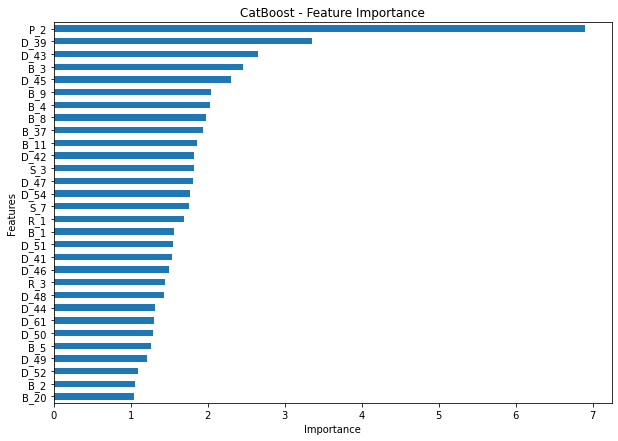

In [32]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [33]:
preds = pd.DataFrame(preds1)
preds.columns = ['score']
submission = pd.concat([submission, preds], axis = 1)
submission.head(5)

,customer_ID,score
0,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
1,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
2,00018dd4932409baf6083519b52113c2ef58be59e1213e...,0
3,000198b3dc70edd65dbf0d7eddbcb926c6d7dbd7986af1...,0
4,00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b7...,0


In [34]:
submission.to_csv('submission.csv')